In [1]:
## For data
import pandas as pd
import numpy as np
## For plotting
import matplotlib.pyplot as plt
## For parametric fitting
from scipy import optimize

In [2]:
import urllib.request
url = 'https://raw.githubusercontent.com/covid19-eu-zh/covid19-eu-data/master/dataset/covid-19-at.csv'
filename = 'covid_data/covid-19-at.csv'
urllib.request.urlretrieve(url, filename)

('covid_data/covid-19-at.csv', <http.client.HTTPMessage at 0x2469e0faa20>)

In [3]:
import csv
import datetime
from datetime import date

today = date.today()
today = today.strftime("%y-%m-%d")
print("Today's date:", today)

safe_date = date.today()-datetime.timedelta(2)
safe = safe_date.strftime("%y-%m-%d")
print("Safe date:", safe)

date_time_str = '2018-06-29T08:15:27'
date_time_obj = datetime.datetime.strptime(date_time_str, '%Y-%m-%dT%H:%M:%S')

with open('covid_data/covid-19-at.csv', 'r') as i, open('covid_data/covid-19-austria.csv', 'w', newline='') as o:
    r = csv.reader(i, delimiter=',')
    writer = csv.writer(o)
    writer.writerow(["country", "name", "cases", "recovered", "deaths", "tests", "hospitalized", "intensive_care", "datetime"])
    #for row in r:
    #    if row[8] == "2020-05-09T15:00:00": 
    #        writer.writerow(row)
    #        print(row)
    max_value = date_time_obj
    #most recent date
    for row in r:
        if today in row[8]:
            date_time = row[8]
            date_time_object = datetime.datetime.strptime(date_time, '%Y-%m-%dT%H:%M:%S')
            if date_time_object > max_value: 
                max_value = date_time_object
    print("Most recent date: ", max_value)
    
                
                
                
with open('covid_data/covid-19-at.csv', 'r') as i, open('covid_data/covid-19-austria.csv', 'w', newline='') as o:
    r = csv.reader(i, delimiter=',')
    writer = csv.writer(o)
    writer.writerow(["country", "name", "cases", "recovered", "deaths", "tests", "hospitalized", "intensive_care", "datetime"])
                
    #create csv with most recent data           
    for row in r:
        if today in row[8]:
            date_time = row[8]
            date_time_object = datetime.datetime.strptime(date_time, '%Y-%m-%dT%H:%M:%S')
            if date_time_object == max_value: 
                writer.writerow(row)
                #print(row)    
        

pd.read_csv('covid_data/covid-19-austria.csv') 

Today's date: 20-06-03
Safe date: 20-06-01
Most recent date:  2020-06-03 09:30:00


,country,name,cases,recovered,deaths,tests,hospitalized,intensive_care,datetime
0,AT,Burgenland,342,328,11,13232,2,0,2020-06-03T09:30:00
1,AT,Kärnten,416,398,13,17836,0,0,2020-06-03T09:30:00
2,AT,Vorarlberg,900,867,19,21931,0,0,2020-06-03T09:30:00
3,AT,Salzburg,1220,1197,38,33675,0,0,2020-06-03T09:30:00
4,AT,Steiermark,1837,1655,148,52371,7,2,2020-06-03T09:30:00
5,AT,Oberösterreich,2297,2221,61,64275,3,0,2020-06-03T09:30:00
6,AT,Niederösterreich,2867,2687,100,73642,19,6,2020-06-03T09:30:00
7,AT,Wien,3260,2894,172,111587,49,11,2020-06-03T09:30:00
8,AT,Tirol,3535,3425,108,74409,7,2,2020-06-03T09:30:00
9,AT,NaN,16674,15672,670,462958,87,21,2020-06-03T09:30:00


In [4]:
with open('covid_data/covid-19-at.csv', 'r') as i, open('covid_data/covid-19-austria_time_total_unique.csv', 'w', newline='') as o:
    r = csv.reader(i, delimiter=',')
    writer = csv.writer(o)
    writer.writerow(["country", "name", "cases", "recovered", "deaths", "tests", "hospitalized", "intensive_care", "datetime"])
    dates = []            
    #create csv with most recent data           
    for row in r:
        #print(row)
        if row[1] == '':
            date = row[8].split("T")[0]
            if date not in dates:
                #print(date)
                dates.append(date)
                writer.writerow(row)
                #print(row)    
            
pd.read_csv('covid_data/covid-19-austria_time_total_unique.csv') 

,country,name,cases,recovered,deaths,tests,hospitalized,intensive_care,datetime
0,AT,NaN,7269,NaN,NaN,NaN,702,110,2020-03-27T08:00:00
1,AT,NaN,8346,NaN,NaN,NaN,744,135,2020-03-28T08:00:00
2,AT,NaN,9103,NaN,NaN,NaN,931,187,2020-03-29T09:30:00
3,AT,NaN,9772,NaN,NaN,NaN,999,193,2020-03-30T09:30:00
4,AT,NaN,10366,NaN,NaN,NaN,1,198,2020-03-31T09:30:00
...,...,...,...,...,...,...,...,...,...
64,AT,NaN,16594,15347.0,668.0,434302.0,103,25,2020-05-30T08:00:00
65,AT,NaN,16638,15520.0,668.0,442143.0,98,23,2020-05-31T08:30:00
66,AT,NaN,16642,15593.0,668.0,448534.0,97,27,2020-06-01T08:00:00
67,AT,NaN,16663,15596.0,668.0,451820.0,97,29,2020-06-02T08:00:00


In [5]:
# Import Data
df_global = pd.read_csv("covid_data/covid-19-austria_time_total_unique.csv")
# Prepare Data

name_global = df_global['name'].tolist()
intensive_care_global = df_global['intensive_care'].tolist()
cases_global = df_global['cases'].tolist()
deaths_global = df_global['deaths'].tolist()
recovered_global = df_global['recovered'].tolist()
hospitalized_global = df_global['hospitalized'].tolist()
tests_global = df_global['tests'].tolist()
date_global = df_global['datetime'].tolist()

In [6]:
values_case = cases_global
values_deaths = deaths_global
values_new = []
datas = date_global

lowerTotal = 0
i = 0




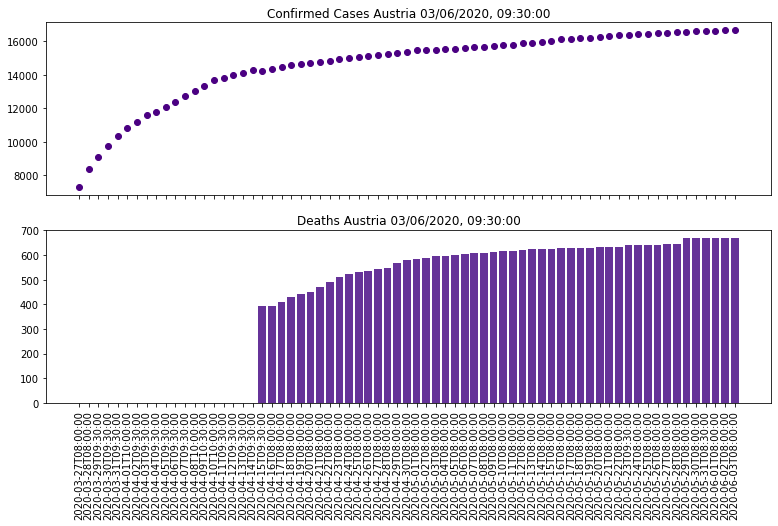

In [7]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(13,7))
y_pos = np.arange(len(datas))

ax[0].scatter(datas, values_case, color="indigo")
plt.xticks(y_pos, datas, rotation='vertical')
ax[0].set(title="Confirmed Cases Austria "+max_value.strftime("%d/%m/%Y, %H:%M:%S"))
ax[1].bar(datas, values_deaths, color="rebeccapurple")
ax[1].set(title="Deaths Austria "+max_value.strftime("%d/%m/%Y, %H:%M:%S"))
plt.savefig('images/time_unique_deaths_cases.png', dpi=300, format='png')
plt.show()


**Number of cases**

In [8]:
'''
Linear function: f(x) = a + b*x
'''
def f(x):
    return 10 + 1500*x

y_linear = f(x=np.arange(len(values_case)))

'''
Exponential function: f(x) = a + b^x
'''
def f(x):
    return 10 + 1.18**x

y_exponential = f(x=np.arange(len(values_case)))


'''
Logistic function: f(x) = a / (1 + e^(-b*(x-c)))
'''
def f(x): 
    return 90000 / (1 + np.exp(-0.5*(x-20)))

y_logistic = f(x=np.arange(len(values_case)))

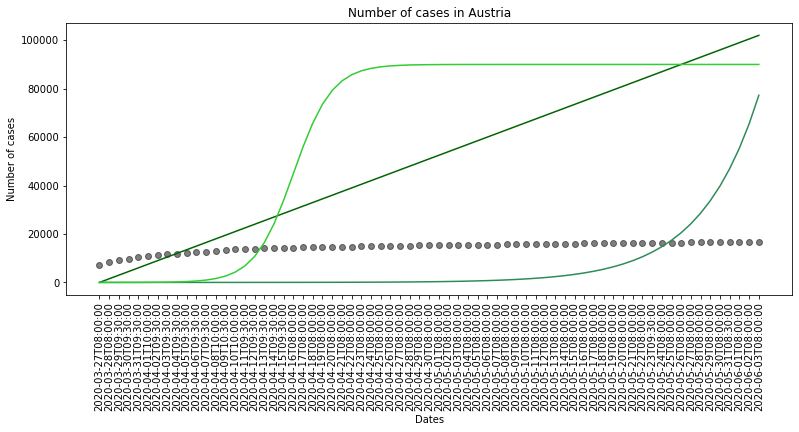

In [9]:
fig, ax = plt.subplots(figsize=(13,5))
y_pos = np.arange(len(datas))


ax.scatter(y_pos, values_case, alpha=0.5, color='black')
plt.xticks(y_pos, datas, rotation='vertical')
ax.plot(y_pos, y_linear, label="linear", color="darkgreen")
ax.plot(y_pos, y_exponential, label="exponential", color="seagreen")
ax.plot(y_pos, y_logistic, label="logistic", color="limegreen")
plt.ylabel('Number of cases')
plt.xlabel('Dates')
plt.title('Number of cases in Austria')
plt.savefig('images/prediction_numberofcases.png', dpi=300, format='png')
plt.show()

**Number of deaths**

In [10]:
'''
Linear function: f(x) = a + b*x
'''
def f(x):
    return 10 + 1500*x

y_linear = f(x=np.arange(len(values_deaths)))

'''
Exponential function: f(x) = a + b^x
'''
def f(x):
    return 10 + 1.18**x

y_exponential = f(x=np.arange(len(values_deaths)))


'''
Logistic function: f(x) = a / (1 + e^(-b*(x-c)))
'''
def f(x): 
    return 90000 / (1 + np.exp(-0.5*(x-20)))

y_logistic = f(x=np.arange(len(values_deaths)))

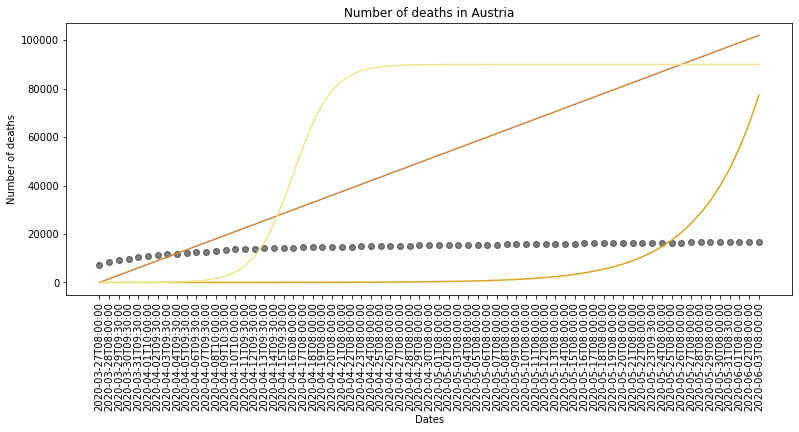

In [11]:
fig, ax = plt.subplots(figsize=(13,5))
y_pos = np.arange(len(datas))


ax.scatter(y_pos, values_case, alpha=0.5, color='black')
plt.xticks(y_pos, datas, rotation='vertical')
ax.plot(y_pos, y_linear, label="linear", color="peru")
ax.plot(y_pos, y_exponential, label="exponential", color="goldenrod")
ax.plot(y_pos, y_logistic, label="logistic", color="khaki")
plt.ylabel('Number of deaths')
plt.xlabel('Dates')
plt.title('Number of deaths in Austria')
plt.savefig('images/prediction_numberofdeaths.png', dpi=300, format='png')
plt.show()

**Parametric Fitting**

In [12]:
df=pd.read_csv(open("covid_data/covid-19-austria_time_total_unique.csv"))
df.index = df['datetime']

In [13]:
dates = df['datetime'].tolist()
#date = []

#for i in dates:
#    data = i.split("T")[0]
#    date.append(data)
    
date = []
count = 0
for i in dates:
    count+=1
    date.append(count)

xvalues=np.arange(len(date))

totalcases = df['cases'].tolist()

print(date)
print(totalcases)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69]
[7269, 8346, 9103, 9772, 10366, 10842, 11199, 11589, 11770, 12058, 12390, 12721, 13005, 13337, 13667, 13838, 13962, 14100, 14265, 14246, 14370, 14484, 14595, 14662, 14713, 14790, 14840, 14932, 14987, 15069, 15134, 15190, 15256, 15323, 15369, 15458, 15479, 15514, 15538, 15569, 15589, 15652, 15675, 15735, 15777, 15792, 15877, 15921, 15980, 16030, 16133, 16151, 16179, 16231, 16275, 16320, 16358, 16402, 16429, 16458, 16476, 16510, 16541, 16564, 16594, 16638, 16642, 16663, 16674]


In [14]:
'''
Logistic function: f(x) = capacity / (1 + e^-k*(x - midpoint) )
'''
def logistic_f(xdata, c, k, m):
    ydata = c / (1 + np.exp(-k*(xdata-m)))
    return ydata
## optimize from scipy
logistic_model, cov = optimize.curve_fit(logistic_f, xdata=xvalues, ydata=totalcases, maxfev=100000, p0=[np.max(totalcases), 1, 1])
## print the parameters
logistic_model

array([ 1.61940403e+04,  9.94298486e-02, -1.11236416e+00])

In [15]:
'''
Plot parametric fitting.
'''
def utils_plot_parametric(dtf, zoom=30, figsize=(15,5)):
    ## interval
    dtf["residuals"] = dtf["ts"] - dtf["model"]
    dtf["conf_int_low"] = dtf["forecast"] - 1.96*dtf["residuals"].std()
    dtf["conf_int_up"] = dtf["forecast"] + 1.96*dtf["residuals"].std()
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=figsize)
    
    ## entire series
    dtf["ts"].plot(marker=".", linestyle='None', ax=ax[0], title="Parametric Fitting", color="black")
    dtf["model"].plot(ax=ax[0], color="maroon")
    dtf["forecast"].plot(ax=ax[0], grid=True, color="salmon")
    ax[0].fill_between(x=dtf.index, y1=dtf['conf_int_low'], y2=dtf['conf_int_up'], color='b', alpha=0.3)
    
    plt.show()
    return dtf[["ts","model","residuals","conf_int_low","forecast","conf_int_up"]]

In [16]:
'''
Forecast unknown future.
:parameter
    :param ts: pandas series
    :param f: function
    :param model: list of optim params
    :param pred_ahead: number of observations to forecast (ex. pred_ahead=30)
    :param freq: None or str - 'B' business day, 'D' daily, 'W' weekly, 'M' monthly, 'A' annual, 'Q' quarterly
    :param zoom: for plotting
'''
def forecast_curve(ts, f, model, pred_ahead=None, zoom=30, freq="D", figsize=(15,5)):
    ## fit
    X = np.arange(len(ts))
    fitted = f(X, model[0], model[1], model[2])
    dtf = ts.to_frame(name="ts")
    dtf["model"] = fitted
    
    ## index
    start=0
    index = pd.date_range(start=start,periods=pred_ahead)
    index = index[1:]
    ## forecast
    Xnew = np.arange(len(ts)+1, len(ts)+1+len(index))
    preds = f(Xnew, model[0], model[1], model[2])
    dtf = dtf.append(pd.DataFrame(data=preds, index=index, columns=["forecast"]))
    
    ## plot
    utils_plot_parametric(dtf, zoom=zoom)
    return dtf

In [17]:

res = df['cases'].astype(np.float) 

print(res)

preds = forecast_curve(df["cases"], logistic_f, logistic_model, pred_ahead=30, zoom=7 ,freq="D")



NameError: name 'dtf' is not defined

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69]


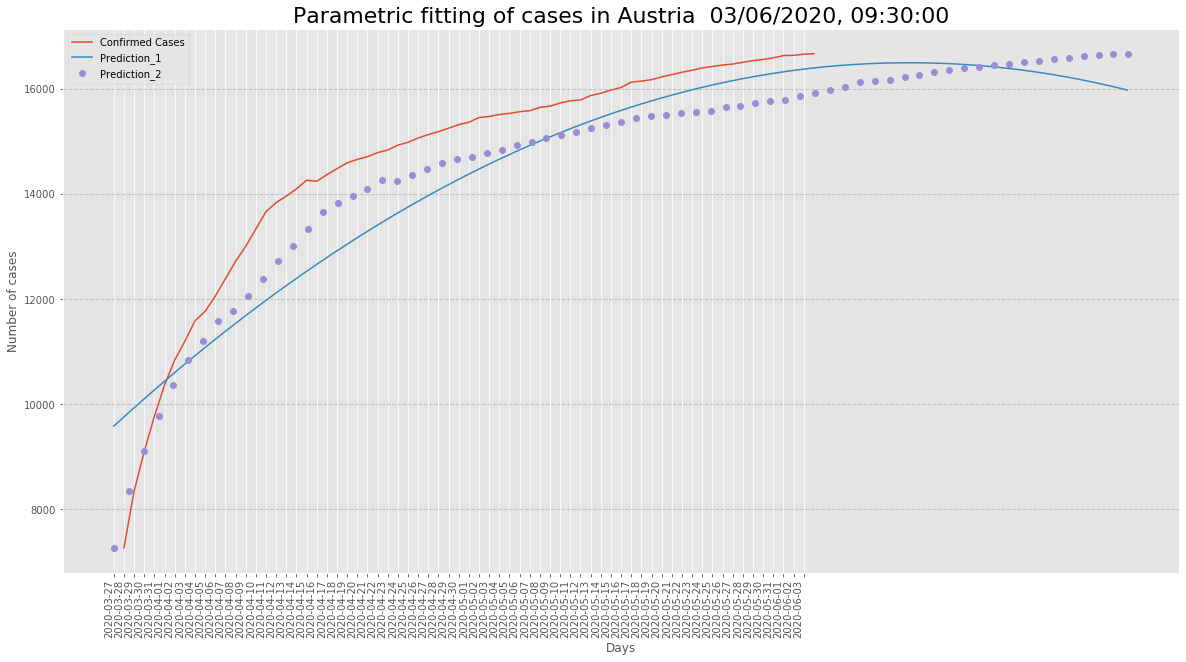

In [19]:
import numpy as np

date = []

for i in dates:
    data = i.split("T")[0]
    date.append(data)

list = []
count = 0
for i in dates:
    count+=1
    list.append(count)
print(list)

x_data = np.array(list)
y_data = np.array(cases_global)

tt = np.linspace(0, 100, len(x_data))

x_params = np.polyfit(tt, x_data, 1)
y_params = np.polyfit(tt, y_data, 2)

y = np.poly1d(y_params)

t = np.arange(0, 100, 0.1)

plt.style.use('ggplot')
plt.subplots(figsize=(20,10))
plt.plot(list, cases_global, label='Confirmed Cases')
plt.plot(t, y(t), label='Prediction_1')
plt.plot(tt, y_data, 'o', label='Prediction_2')
plt.legend()

plt.xticks(y_pos, date, rotation='vertical')
plt.gca().set_xticklabels(date, rotation="vertical", horizontalalignment= 'right')
plt.title("Parametric fitting of cases in Austria  "+max_value.strftime("%d/%m/%Y, %H:%M:%S"), fontsize=22)
plt.ylabel('Number of cases')
plt.xlabel('Days')
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.5)
plt.savefig('images/parametric_cases.png', dpi=400, format='png')
plt.show()

In [ ]:
import numpy as np

date = []

for i in dates:
    data = i.split("T")[0]
    date.append(data)

list = []
count = 0
for i in dates:
    count+=1
    list.append(count)
print(list)

x_data = np.array(list[20:])
y_data = np.array(deaths_global[20:])

tt = np.linspace(0, 100, len(x_data))

x_params = np.polyfit(tt, x_data, 1)
y_params = np.polyfit(tt, y_data, 2)

y = np.poly1d(y_params)

t = np.arange(0, 100, 0.1)

plt.style.use('ggplot')
plt.subplots(figsize=(20,10))
plt.plot(list[20:], deaths_global[20:], label='Deaths')
plt.plot(t, y(t), label='Prediction_1')
plt.plot(tt, y_data, 'o', label='Prediction_2')
plt.legend()

plt.xticks(y_pos, date, rotation='vertical')
plt.gca().set_xticklabels(date[0:60], rotation="vertical", horizontalalignment= 'right')
plt.title("Parametric fitting of deaths in Austria  "+max_value.strftime("%d/%m/%Y, %H:%M:%S"), fontsize=22)
plt.ylabel('Number of deaths')
plt.xlabel('Days')
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.5)
plt.savefig('images/parametric_deaths.png', dpi=400, format='png')
plt.show()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69]
